# Binding classification with XGBoost using regression as an intermediate step


---

I will first train a regression on all data points in a CV scheme, then train a classificator using the predited IC50 values too. ( Using the the same folds in regression and classification prevents label leakage. )


----

- Cross validation using the all data

- Using all observations (all species, </=/> values too)

- simple one-hot encoding scheme for all categorical variables (species, hla type/subtypes,sequence)


----


Note: this is the result of a lucky seed, further evaluations are necessary.

---

In [1]:
import os,sys

#my functions
sys.path.append('../')
from utils import load_all_data,my_xgb_cv_predict,plot_roc

#go to working dir
work_dir='/data/data1/ribli/mhc/'
os.chdir(work_dir)

%matplotlib inline

Using Theano backend.


### Load data

In [2]:
x,y,y_c=load_all_data(hla_representation='one-hot',
    species_representation='one-hot',
    seq_representation='one-hot')

Reading from file...
Creating representation...
Using  137654  training data points
Using  27680  testing data points
Done, It took: 8.32608795166 s


### Train a regressor

In [3]:
#model params
params = {'max_depth':20,
         'eta':0.2,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "reg:linear",
         'eval_metric': 'rmse',
         'nthread':8}

y_reg_pred=my_xgb_cv_predict(params,x,y,n_folds=5,seed=1000)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.675918	eval-rmse:2.663044
[500]	train-rmse:0.170795	eval-rmse:0.763470
Stopping. Best iteration:
[373]	train-rmse:0.215311	eval-rmse:0.762651

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.676275	eval-rmse:2.686200
Stopping. Best iteration:
[277]	train-rmse:0.264741	eval-rmse:0.767010

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.672185	eval-rmse:2.678361
[500]	train-rmse:0.167446	eval-rmse:0.767583
Stopping. Best iteration:
[312]	train-rmse:0.241508	eval-rmse:0.766366

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.664633	eval-rmse:2.661364
Stopping. Best iteration:
[285]	train-rmse:0.259687	eval-rmse:0.768779

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-rmse:2.664806	eval-rmse:2.670448
[500]	train-rmse:0.166747	eval-rmse:0.759278
Stopping. Best iteration:
[311]	train-rmse:0.240019	eval-rmse:

Correlation: 0.821959082142


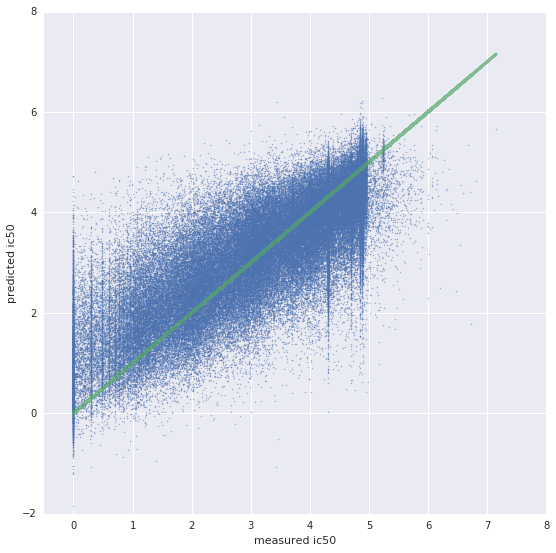

In [4]:
from utils import corr_plot
corr_plot(y,y_reg_pred)

### Add predicted IC50 values to x

In [5]:
import numpy as np
x_w_reg=np.column_stack([x,y_reg_pred])

### Train a classificator

In [8]:
#model params
params = {'max_depth':20,
         'eta':0.01,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "binary:logistic",
         'eval_metric': 'auc',
         'nthread':8}

y_pred=my_xgb_cv_predict(params,x_w_reg,y_c,n_folds=5,seed=1000)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.940125	eval-auc:0.933673
Stopping. Best iteration:
[278]	train-auc:0.958304	eval-auc:0.938037

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.940055	eval-auc:0.930788
[500]	train-auc:0.963321	eval-auc:0.936393
Stopping. Best iteration:
[624]	train-auc:0.965602	eval-auc:0.936439

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.941258	eval-auc:0.931231
Stopping. Best iteration:
[206]	train-auc:0.956018	eval-auc:0.935027

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.940721	eval-auc:0.928923
[500]	train-auc:0.963235	eval-auc:0.935504
Stopping. Best iteration:
[583]	train-auc:0.964650	eval-auc:0.935568

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.942009	eval-auc:0.930337
Stopping. Best iteration:
[298]	train-auc:0.959838	eval-auc:0.934272



### ROC plot

AUC: 0.935165853376


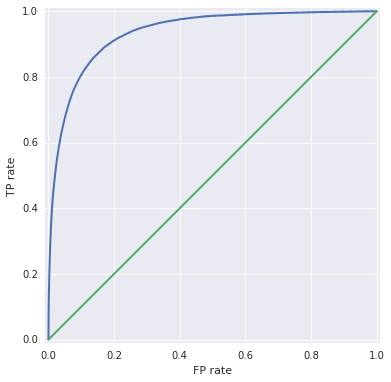

In [9]:
plot_roc(y_c,y_pred)